# Setup

In [4]:
%pip install -e ..[dev]

zsh:1: no matches found: ..[dev]
Note: you may need to restart the kernel to use updated packages.


# 🤖 Focoos Foundational Models


In [2]:
from focoos import Focoos, DEV_API_URL
from pprint import pprint
import os

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"), host_url=DEV_API_URL)

pprint(focoos.list_focoos_models())

[11/27 15:53][INFO][focoos]: Currently logged as: fabio.cermelli@focoos.ai environment: https://api.dev.focoos.ai/v0


[{'description': '🤖 A pixel wizard that sees what others can’t!',
  'focoos_model': 'rtdetr_base.hybrid_base.presnet50',
  'name': 'focoos_rtdetr',
  'ref': 'focoos_rtdetr',
  'status': 'DEPLOYED',
  'task': 'detection'},
 {'description': 'rtdetr',
  'focoos_model': 'rtdetr_base.hybrid_base.presnet50',
  'name': 'focoos_object365',
  'ref': 'focoos_object365',
  'status': 'DEPLOYED',
  'task': 'detection'},
 {'description': 'focoos_ade_small',
  'focoos_model': 'maskformer_tiny.fcn_small.stdc1',
  'name': 'focoos_ade_small',
  'ref': 'focoos_ade_small',
  'status': 'DEPLOYED',
  'task': 'semseg'},
 {'description': 'focoos_ade_small',
  'focoos_model': 'maskformer_tiny.fpn_small.stdc2',
  'name': 'focoos_ade_medium',
  'ref': 'focoos_ade_medium',
  'status': 'DEPLOYED',
  'task': 'semseg'},
 {'description': '',
  'focoos_model': 'maskformer_tiny.fpn_small.stdc2',
  'name': 'focoos_ade_ins_medium',
  'ref': 'focoos_ade_ins_medium',
  'status': 'DEPLOYED',
  'task': 'instseg'},
 {'descrip

## Cloud Inference

[11/27 15:53][INFO][focoos]: Currently logged as: fabio.cermelli@focoos.ai environment: https://api.dev.focoos.ai/v0
[11/27 15:53][INFO][focoos]: [RemoteModel]: ref: focoos_object365 name: focoos_object365 description: rtdetr status: DEPLOYED
[11/27 15:53][DEBUG][focoos]: Inference time: 0.202 seconds


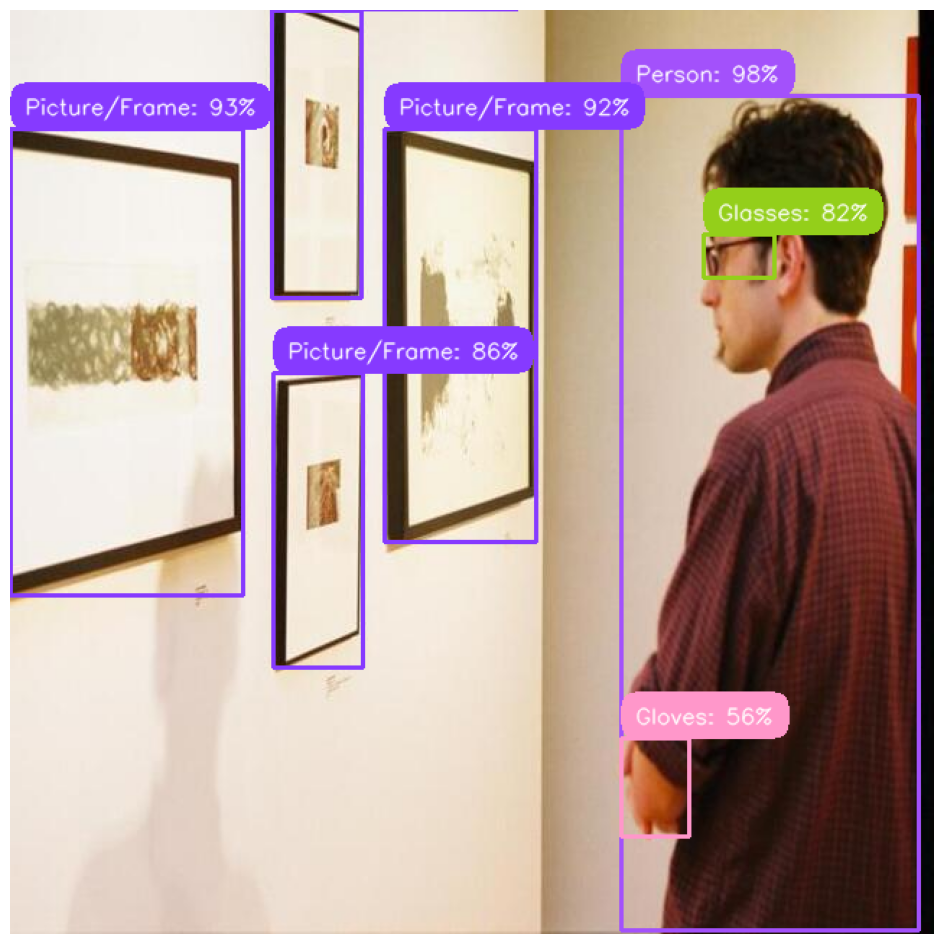

In [4]:
from pprint import pprint
import os
from focoos import Focoos, DEV_API_URL
from supervision import plot_image


model_ref = "focoos_object365"
image_path = "./assets/ade_val_034.jpg"

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"), host_url=DEV_API_URL)

model = focoos.get_remote_model(model_ref)
## Only admin can deploy foundational models

output, preview = model.infer(image_path, threshold=0.4, annotate=True)
plot_image(preview)

## Local Inference

This section demonstrates how to perform local inference using a model from the Focoos platform. 
We will load a model, deploy it locally, and then run inference on a sample image.


In [ ]:
from focoos import Focoos, LOCAL_API_URL
import os
from pprint import pprint
from supervision import plot_image


focoos = Focoos(
    api_key=os.getenv("FOCOOS_API_KEY"),
    host_url=LOCAL_API_URL,
)
image_path = "./assets/ade_val_034.jpg"
model_ref = "focoos_object365"


model = focoos.get_local_model(model_ref)

latency = model.benchmark(iterations=10, size=640)
pprint(latency)
# pprint(latency)
output, preview = model.infer(image_path, threshold=0.3, annotate=True)
pprint(output.detections)
pprint(output.latency)

plot_image(preview)

# User Models

### List User Models

In [ ]:
from pprint import pprint
import os
from focoos import Focoos, DEV_API_URL
from dotenv import load_dotenv


load_dotenv()

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"), host_url=DEV_API_URL)

models = focoos.list_models()
pprint(models)

## Create Model

In [ ]:
from pprint import pprint
import os
from focoos import DeploymentMode, Focoos, DEV_API_URL
from dotenv import load_dotenv


load_dotenv()

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"), host_url=DEV_API_URL)

model = focoos.new_model(
    name="test-model", focoos_model="focoos_object365", description="Test model"
)
### Get Model Info

## Deploy user model on shared cloud endpoint

In [6]:
from pprint import pprint
import os
from focoos import Focoos,DEV_API_URL
from dotenv import load_dotenv


load_dotenv()

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"), host_url=DEV_API_URL)

model = focoos.get_remote_model("fa94df6806c84c11")
model_info = model.get_info()


[11/27 15:54][INFO][focoos]: Currently logged as: fabio.cermelli@focoos.ai environment: https://api.dev.focoos.ai/v0
[11/27 15:54][ERROR][focoos]: Failed to get model info: 404 {"detail":"Model not found 😢"}


ValueError: Failed to get model info: 404 {"detail":"Model not found 😢"}

## Cloud Inference

In [5]:
from pprint import pprint
import os
from focoos import Focoos
from dotenv import load_dotenv
import cv2
import numpy as np
import supervision as sv

load_dotenv()

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"), host_url=DEV_API_URL)

model = focoos.get_remote_model("fa94df6806c84c11")
model_info = model.get_info()
image_path = "./assets/aquarium.jpg"

output, preview = model.infer(image_path, threshold=0.5, annotate=True)
sv.plot_image(preview)

[11/27 15:54][INFO][focoos]: Currently logged as: fabio.cermelli@focoos.ai environment: https://api.dev.focoos.ai/v0
[11/27 15:54][ERROR][focoos]: Failed to get model info: 404 {"detail":"Model not found 😢"}


ValueError: Failed to get model info: 404 {"detail":"Model not found 😢"}

### Model unload 

In [ ]:
model.unload()

## Local Inference




In [ ]:
from focoos import Focoos, DEV_API_URL, DeploymentMode
import os
from pprint import pprint
from supervision import plot_image


focoos = Focoos(
    api_key=os.getenv("FOCOOS_API_KEY"),
    host_url=DEV_API_URL,
)
image_path = "./assets/aquarium.jpg"
model_ref = "focoos_object365"

model_info = focoos.get_model_info(model_ref)

model = focoos.get_local_model(model_ref)

latency = model.benchmark(iterations=10, size=640)
# pprint(latency)
output, preview = model.infer(image_path, threshold=0.3, annotate=True)

plot_image(preview)

## Train a Model

### List Public Datasets


In [ ]:
from pprint import pprint
import os
from focoos import Focoos, DEV_API_URL
from dotenv import load_dotenv


load_dotenv()

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"), host_url=DEV_API_URL)

models = focoos.list_models()
pprint(models)

model = focoos.new_model(
    name="test-model-2", focoos_model="focoos_object365", description="Test model"
)


model = focoos.get_remote_model("fa94df6806c84c11")

datasets = focoos.list_shared_datasets()
pprint(datasets)

In [ ]:
from focoos.ports import Hyperparameters, TrainInstance


res = model.remote_train(
    anyma_version="0.11.1",
    dataset_ref="11e80dd77806450f",
    instance_type=TrainInstance.ML_G4DN_XLARGE,
    volume_size=50,
    max_runtime_in_seconds=36000,
    hyperparameters=Hyperparameters(
        learning_rate=0.0001,
        batch_size=16,
        max_iters=1500,
        eval_period=100,
        resolution=640,
    ),  # type: ignore
)
pprint(res)

In [ ]:
completed_status = ["Completed", "Failed"]
import time
from focoos.utils.logger import get_logger

logger = get_logger(__name__)

status = model.train_status()
while status["main_status"] not in completed_status:
    status = model.train_status()
    logger.info(f"Training status: {status['main_status']}")
    pprint(f"Training progress: {status['status_transitions']}")
    time.sleep(30)

In [ ]:
logs = model.train_logs()
pprint(logs)